In [2]:
import yaml
import argparse
import numpy as np
import os

from models import *
from experiment import VAEXperiment
import torch
import torch.backends.cudnn as cudnn
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TestTubeLogger
from pytorch_lightning.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

filename = './configs/numbers_soft.yaml'
with open(filename, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

# For reproducibility
torch.manual_seed(config['logging_params']['manual_seed'])
np.random.seed(config['logging_params']['manual_seed'])
cudnn.deterministic = True
cudnn.benchmark = False

model_save_path = os.getcwd()#'{}/{}/version_{}'.format(config['logging_params']['save_dir'], config['logging_params']['name'], tt_logger.version)
parent = '/'.join(model_save_path.split('/')[:-3])
config['logging_params']['save_dir'] = os.path.join(parent, config['logging_params']['save_dir'])
config['exp_params']['data_path'] = os.path.join(parent, config['exp_params']['data_path'])
print(parent, config['exp_params']['data_path'])

model = vae_models[config['model_params']['name']](imsize=config['exp_params']['img_size'], **config['model_params'])
experiment = VAEXperiment(model,
                          config['exp_params'])

weights = [x for x in os.listdir(model_save_path) if '.ckpt' in x]
weights.sort(key=lambda x: os.path.getmtime(x))
load_weight = weights[-1]
print('loading: ', load_weight)

checkpoint = torch.load(load_weight)
experiment.load_state_dict(checkpoint['state_dict'])
train_dataloader = experiment.train_dataloader()
experiment.eval()
experiment.freeze()

/home/creddy/Work/vae /home/creddy/Work/vae/./data/numbers_changed/
Using Differential Compositing
loading:  last.ckpt


In [31]:
def interpolate_mini(experiment, x, **kwargs) -> Tensor:
    mu, log_var = experiment.model.encode(x)
    z = experiment.model.interpolate_vectors(mu[0], mu[1], 10)
    output = experiment.model.decode_and_composite(z, verbose=kwargs['verbose'])
    return output


def search_samples(search_string):
    for idx, name in enumerate(experiment.sample_dataloader.dataset.samples):
        if search_string in name[0]:
            return idx
    return 'NA'

In [23]:
idx1 = search_samples('0_Akashi_6_8.png')
idx2 = search_samples('0_Akashi_4_8.png')

x1, _ = experiment.sample_dataloader.dataset[idx1]
x2, _ = experiment.sample_dataloader.dataset[idx2]

x = torch.stack([x1, x2], dim=0)

In [32]:
interpolation = interpolate_mini(experiment, x, verbose=False)

/home/creddy/anaconda3/envs/sets/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/creddy/anaconda3/envs/sets/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
vutils.save_image(interpolation.cpu().data,
                  f"./custom_interpolation.png",
                  normalize=False,
                  nrow=10)

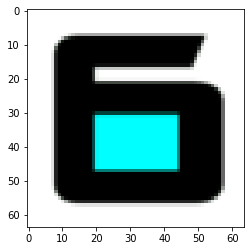

In [22]:
k = np.zeros([64,64,3])
k[:,:,0] = t[0,:,:]
k[:,:,1] = t[1,:,:]
k[:,:,2] = t[2,:,:]
plt.imshow(k)